# Etude impact des paramètres sur la qualité image

In [2]:
import os
import re

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
PATH = "./QI/Data_Autopia"

def plot(filepath, column_name, x_data, x_label, x_lim, start_CNR_column):
    df = pd.read_csv(filepath)

    df.loc[-1] = [i.split("_")[-2] if column_name in i else "" for i in df.columns] 
    df = df.T

    MTF_50, MTF_20, MTF_10 = [], [], []
    CNR_1, CNR_3, CNR_5, CNR_7, CNR_9, CNR_11, CNR_13 = [], [], [], [], [], [], []
    CNR_1_v, CNR_3_v, CNR_5_v, CNR_7_v, CNR_9_v, CNR_11_v, CNR_13_v = [], [], [], [], [], [], []

    for x in x_data:
        df_x = df.loc[df[-1] == str(x)]

        # MTF
        df_MTF_50 = df_x[5] 
        df_MTF_20 = df_x[6]
        df_MTF_10 = df_x[7] 

        df_MTF_50 = pd.to_numeric(df_MTF_50)
        df_MTF_20 = pd.to_numeric(df_MTF_20)
        df_MTF_10 = pd.to_numeric(df_MTF_10)

        MTF_50.append(df_MTF_50.mean())
        MTF_20.append(df_MTF_20.mean())
        MTF_10.append(df_MTF_10.mean())

        # CNR
        df_CNR_1 = df_x[start_CNR_column]
        df_CNR_3 = df_x[start_CNR_column+4]
        df_CNR_5 = df_x[start_CNR_column+8]
        df_CNR_7 = df_x[start_CNR_column+12]
        df_CNR_9 = df_x[start_CNR_column+16]
        # df_CNR_11 = df_x[start_CNR_column+20]
        # df_CNR_13 = df_x[start_CNR_column+24]

        df_CNR_1_v = df_x[start_CNR_column+1]
        df_CNR_3_v = df_x[start_CNR_column+5]
        df_CNR_5_v = df_x[start_CNR_column+9]
        df_CNR_7_v = df_x[start_CNR_column+13]
        df_CNR_9_v = df_x[start_CNR_column+17]
        # df_CNR_11_v = df_x[start_CNR_column+21]
        # df_CNR_13_v = df_x[start_CNR_column+25]

        df_CNR_1 = pd.to_numeric(df_CNR_1)
        df_CNR_3 = pd.to_numeric(df_CNR_3)
        df_CNR_5 = pd.to_numeric(df_CNR_5)
        df_CNR_7 = pd.to_numeric(df_CNR_7)
        df_CNR_9 = pd.to_numeric(df_CNR_9)
        # df_CNR_11 = pd.to_numeric(df_CNR_11)
        # df_CNR_13 = pd.to_numeric(df_CNR_13)

        CNR_1.append(df_CNR_1.mean())
        CNR_3.append(df_CNR_3.mean())
        CNR_5.append(df_CNR_5.mean())
        CNR_7.append(df_CNR_7.mean())
        CNR_9.append(df_CNR_9.mean())
        # CNR_11.append(df_CNR_11.mean())
        # CNR_13.append(df_CNR_13.mean())

        CNR_1_v.append((df_CNR_1_v[df_CNR_1_v == "Yes"].count() / len(df_CNR_1_v)) * 100)
        CNR_3_v.append((df_CNR_3_v[df_CNR_3_v == "Yes"].count() / len(df_CNR_3_v)) * 100)
        CNR_5_v.append((df_CNR_5_v[df_CNR_5_v == "Yes"].count() / len(df_CNR_5_v)) * 100)
        CNR_7_v.append((df_CNR_7_v[df_CNR_7_v == "Yes"].count() / len(df_CNR_7_v)) * 100)
        CNR_9_v.append((df_CNR_9_v[df_CNR_9_v == "Yes"].count() / len(df_CNR_9_v)) * 100)
        # CNR_11_v.append((df_CNR_11_v[df_CNR_11_v == "Yes"].count() / len(df_CNR_11_v))*100)
        # CNR_13.append(df_CNR_1_v[df_CNR_1_v == "Yes"].count() / len(df_CNR_1_v))


    # x_data = [3.75, 7.5]

    _, ax = plt.subplots()
    ax.grid(True)
    ax.set_xlabel(x_label)
    ax.set_xticks(x_data)
    ax.set_ylabel("MTF")
    ax.set_xlim(x_lim)
    ax.plot(x_data, MTF_50, "--", label="MTF 50%", marker="o")
    ax.plot(x_data, MTF_20, "--", label="MTF 20%", marker="o")
    ax.plot(x_data, MTF_10, "--", label="MTF 10%", marker="o")
    ax.legend()

    _, ax = plt.subplots()
    ax.grid(True)
    ax.set_xlabel(x_label)
    ax.set_xticks(x_data)
    ax.set_ylabel("CNR")
    ax.set_xlim(x_lim)
    ax.plot(x_data, CNR_1, "--", label="insert 1", marker="o")
    ax.plot(x_data, CNR_3, "--", label="insert 3", marker="o")
    ax.plot(x_data, CNR_5, "--", label="insert 5", marker="o")
    ax.plot(x_data, CNR_7, "--", label="insert 7", marker="o")
    ax.plot(x_data, CNR_9, "--", label="insert 9", marker="o")
    ax.legend()

    _, ax = plt.subplots()
    ax.grid(True)
    ax.set_xlabel(x_label)
    ax.set_xticks(x_data)
    ax.set_ylabel("Inserts visibles (%)")
    ax.set_xlim(x_lim)
    ax.plot(x_data, CNR_1_v, "--", label="insert 1", marker="o")
    ax.plot(x_data, CNR_3_v, "--", label="insert 3", marker="o")
    ax.plot(x_data, CNR_5_v, "--", label="insert 5", marker="o")
    ax.plot(x_data, CNR_7_v, "--", label="insert 7", marker="o")
    ax.plot(x_data, CNR_9_v, "--", label="insert 9", marker="o")
    ax.legend()



## Epaisseur de PMMA

ValueError: 'locs' must be 1D with shape (M,). Your input has shape ().

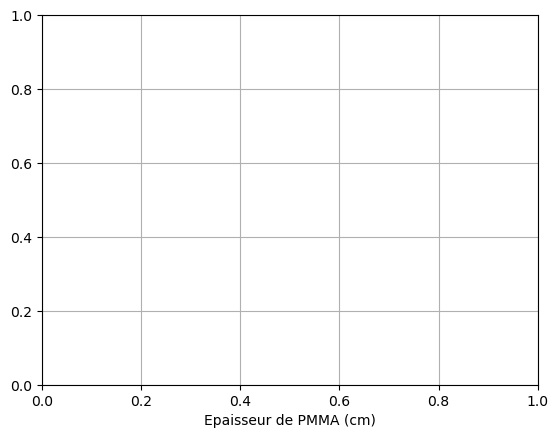

In [38]:
plot(os.path.join(PATH, "EpaisseurPMMA.csv"), "PMMA", [0, 2, 5, 10, 20, 23], "Epaisseur de PMMA (cm)", (0, 23), 26)

## Zoom

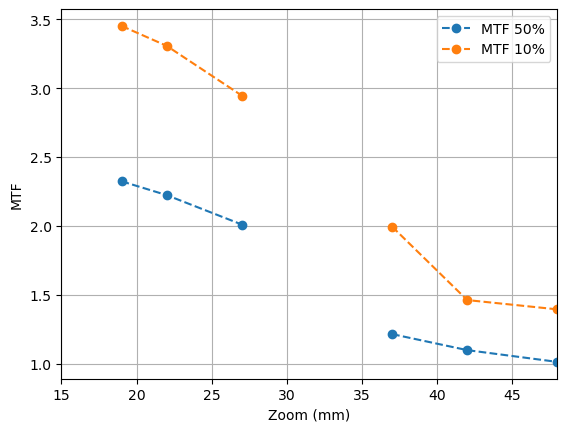

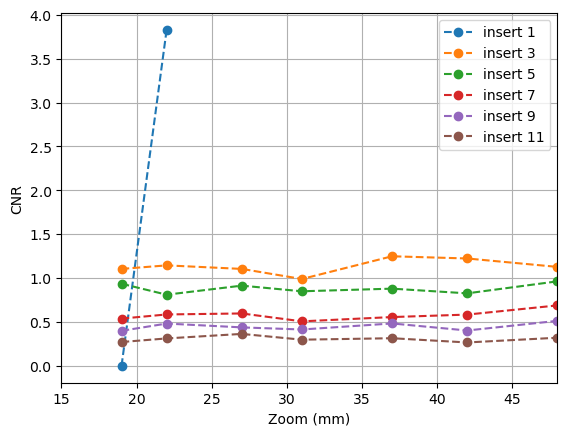

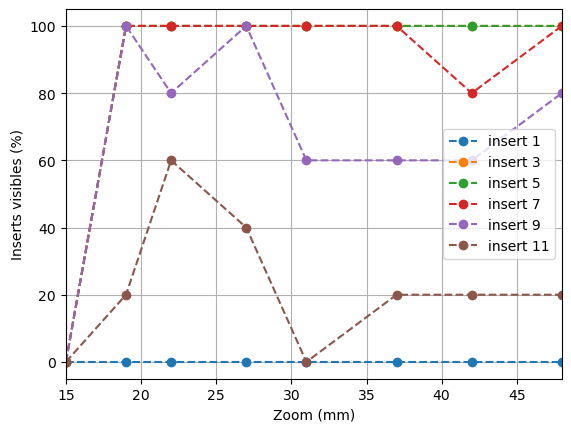

In [ ]:
plot(os.path.join(PATH, "Zoom.csv"), "ZOOM", [15, 19, 22, 27, 31, 37, 42, 48], "Zoom (mm)", (15, 48), 26)

## Niveau de dose

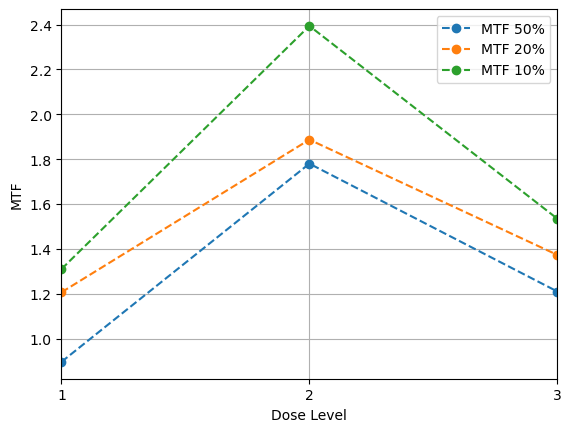

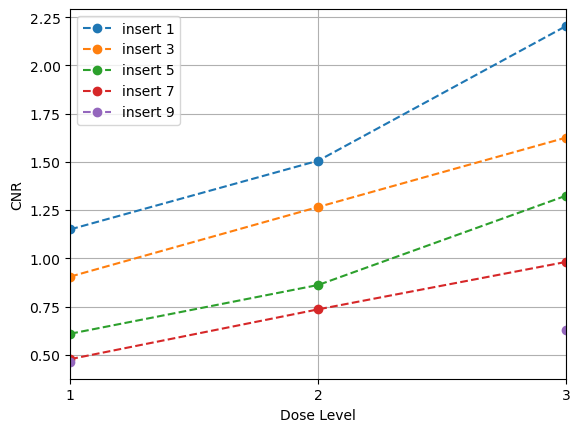

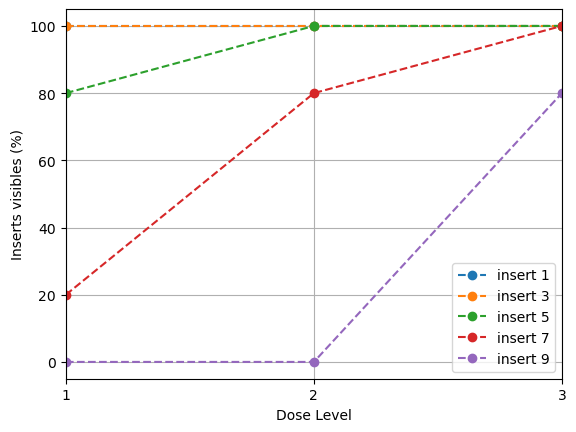

In [8]:
plot(os.path.join(PATH, "DoseLevel.csv"), "DoseLevel", [1, 2, 3], "Dose Level", [1, 3], 26)

## Distance source-peau

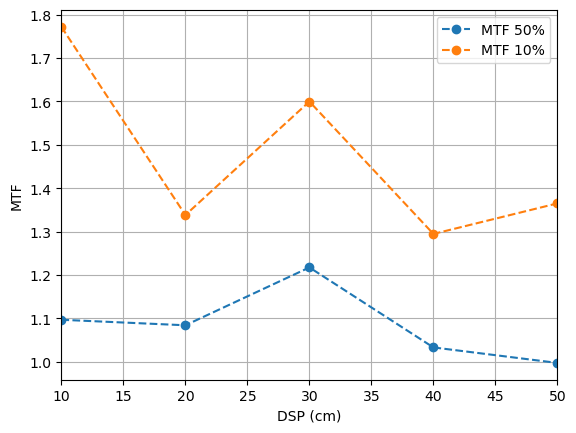

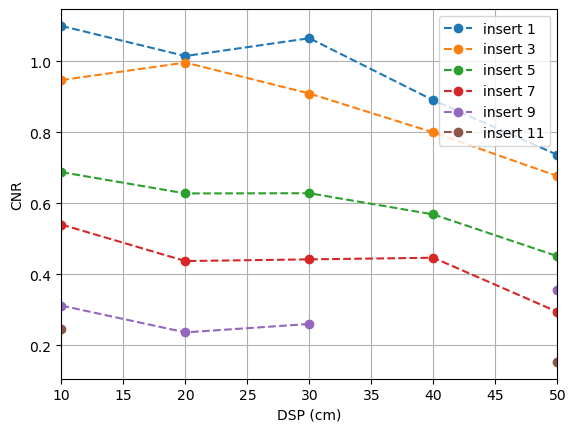

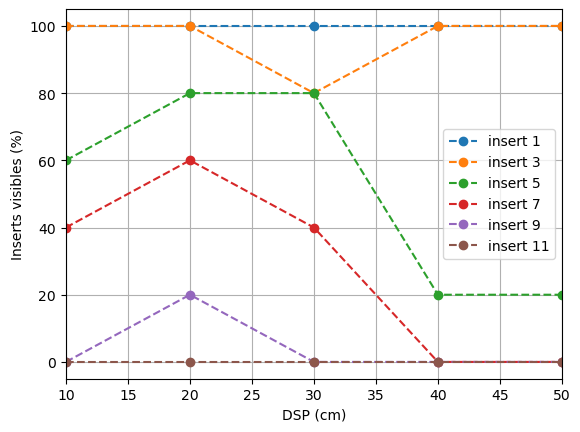

In [ ]:
plot(os.path.join(PATH, "DSP.csv"), "DSP", [10, 20, 30, 40, 50], "DSP (cm)", (10, 50), 26)

## Distance foyer-image

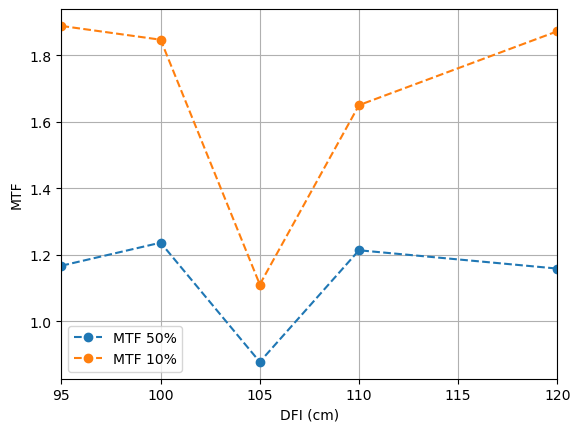

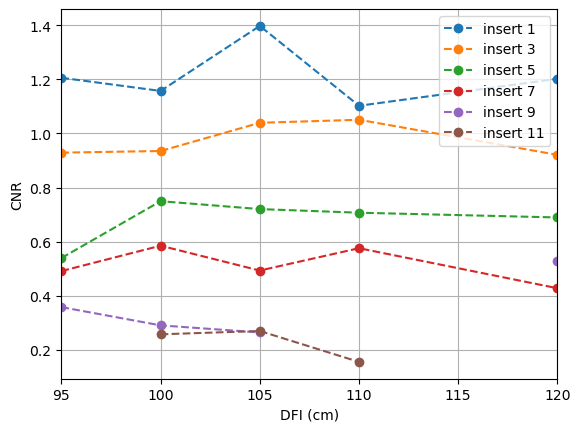

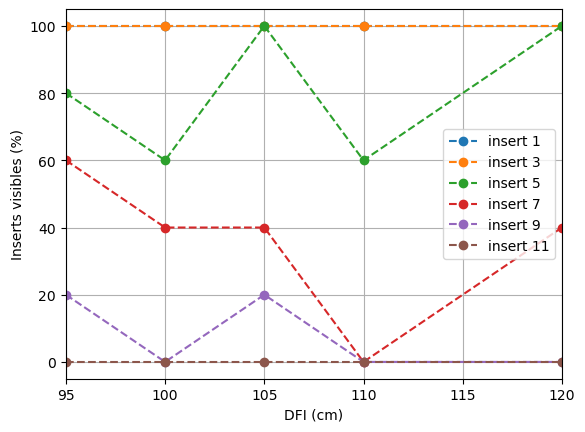

In [ ]:
plot(os.path.join(PATH, "DFI.csv"), "DFI", [95, 100, 105, 110, 120], "DFI (cm)", (95, 120), 25)

## Scopie vs Graphie

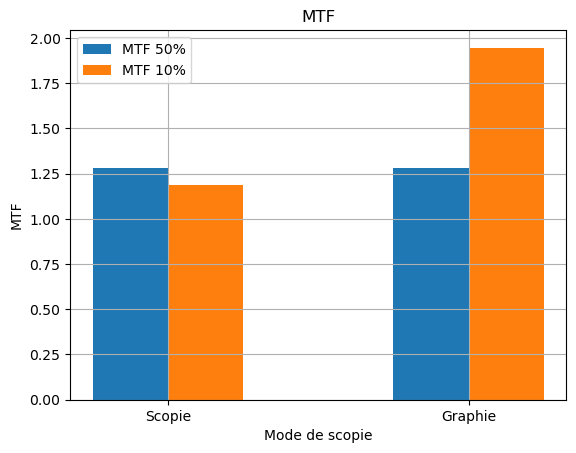

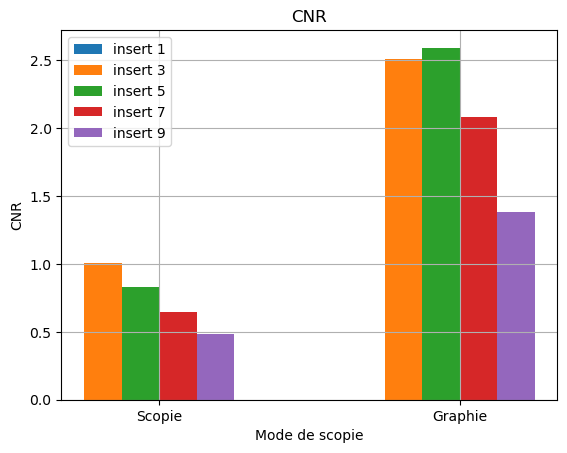

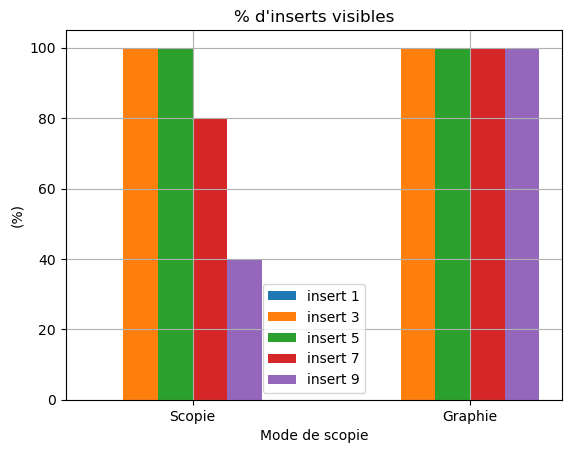

In [76]:
def plot(filepath, x_data, x_label, start_CNR_column):
    df = pd.read_csv(filepath)

    df.loc[-1] = [i.split("_")[0] for i in df.columns] 

    col = []
    for ele in df.columns:
        if "Scopie" in ele or "Graphie_6" in ele: col.append(ele)

    df = df[col]
    df = df.T

    MTF_50, MTF_10 = [], []
    CNR_1, CNR_3, CNR_5, CNR_7, CNR_9 = [], [], [], [], []
    CNR_1_v, CNR_3_v, CNR_5_v, CNR_7_v, CNR_9_v = [], [], [], [], []

    for x in x_data:
        df_x = df.loc[df[-1] == str(x)]

        # MTF
        df_MTF_50 = df_x[5] 
        df_MTF_10 = df_x[7] 

        df_MTF_50 = pd.to_numeric(df_MTF_50)
        df_MTF_10 = pd.to_numeric(df_MTF_10)

        MTF_50.append(df_MTF_50.mean())
        MTF_10.append(df_MTF_10.mean())

        # CNR
        df_CNR_1 = df_x[start_CNR_column]
        df_CNR_3 = df_x[start_CNR_column+4]
        df_CNR_5 = df_x[start_CNR_column+8]
        df_CNR_7 = df_x[start_CNR_column+12]
        df_CNR_9 = df_x[start_CNR_column+16]

        df_CNR_1_v = df_x[start_CNR_column+1]
        df_CNR_3_v = df_x[start_CNR_column+5]
        df_CNR_5_v = df_x[start_CNR_column+9]
        df_CNR_7_v = df_x[start_CNR_column+13]
        df_CNR_9_v = df_x[start_CNR_column+17]

        df_CNR_1 = pd.to_numeric(df_CNR_1)
        df_CNR_3 = pd.to_numeric(df_CNR_3)
        df_CNR_5 = pd.to_numeric(df_CNR_5)
        df_CNR_7 = pd.to_numeric(df_CNR_7)
        df_CNR_9 = pd.to_numeric(df_CNR_9)

        CNR_1.append(df_CNR_1.mean())
        CNR_3.append(df_CNR_3.mean())
        CNR_5.append(df_CNR_5.mean())
        CNR_7.append(df_CNR_7.mean())
        CNR_9.append(df_CNR_9.mean())

        CNR_1_v.append((df_CNR_1_v[df_CNR_1_v == "Yes"].count() / len(df_CNR_1_v))*100)
        CNR_3_v.append((df_CNR_3_v[df_CNR_3_v == "Yes"].count() / len(df_CNR_3_v))*100)
        CNR_5_v.append((df_CNR_5_v[df_CNR_5_v == "Yes"].count() / len(df_CNR_5_v))*100)
        CNR_7_v.append((df_CNR_7_v[df_CNR_7_v == "Yes"].count() / len(df_CNR_7_v))*100)
        CNR_9_v.append((df_CNR_9_v[df_CNR_9_v == "Yes"].count() / len(df_CNR_9_v))*100)

    _, ax = plt.subplots()
    ax.grid(True)
    ax.set_xlabel(x_label)
    ax.set_ylabel("MTF")
    ax.set_title("MTF")
    ax.bar([0, 1], MTF_50, label="MTF 50%", width=0.25)
    ax.bar([0.25, 1.25], MTF_10, label="MTF 10%", width=0.25)
    ax.set_xticks([0.125, 1.125], ["Scopie", "Graphie"])
    ax.legend()

    _, ax = plt.subplots()
    ax.grid(True)
    ax.set_xlabel(x_label)
    ax.set_ylabel("CNR")
    ax.set_title("CNR")
    ax.bar([0, 2], CNR_1, label="insert 1", width=0.25)
    ax.bar([0.25, 2.25], CNR_3, label="insert 3", width=0.25)
    ax.bar([0.5, 2.5], CNR_5, label="insert 5", width=0.25)
    ax.bar([0.75, 2.75], CNR_7, label="insert 7", width=0.25)
    ax.bar([1, 3], CNR_9, label="insert 9", width=0.25)
    ax.set_xticks([0.625, 2.625], ["Scopie", "Graphie"])
    ax.legend()

    _, ax = plt.subplots()
    ax.grid(True)
    ax.set_xlabel(x_label)
    ax.set_ylabel("(%)")
    ax.set_title("% d\'inserts visibles")
    ax.bar([0, 2], CNR_1_v, label="insert 1", width=0.25)
    ax.bar([0.25, 2.25], CNR_3_v, label="insert 3", width=0.25)
    ax.bar([0.5, 2.5], CNR_5_v, label="insert 5", width=0.25)
    ax.bar([0.75, 2.75], CNR_7_v, label="insert 7", width=0.25)
    ax.bar([1, 3], CNR_9_v, label="insert 9", width=0.25)
    ax.set_xticks([0.625, 2.625], ["Scopie", "Graphie"])
    ax.legend()



plot(os.path.join(PATH, "Scopie_Graphie.csv"), ["Scopie", "Graphie"], "Mode de scopie", 25)

## Cadence d'images

[3.75, 7.5] [1.103629658793841, 0.9597924986133272]


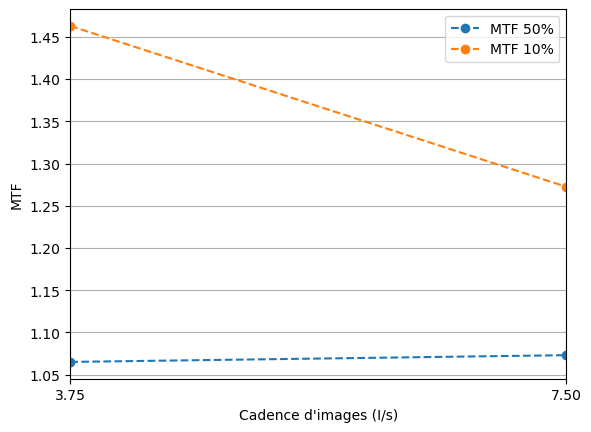

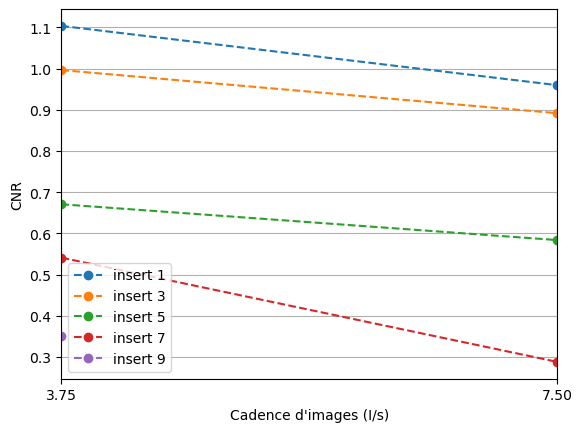

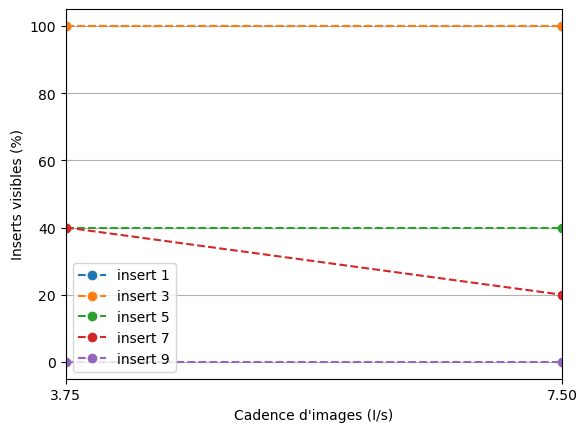

In [ ]:
plot(os.path.join(PATH, "Cadence.csv"), "Cadence", [75, 5], "Cadence d'images (I/s)", (3.75, 7.5), 24, (3.75, 7.5))

## Diaphragme

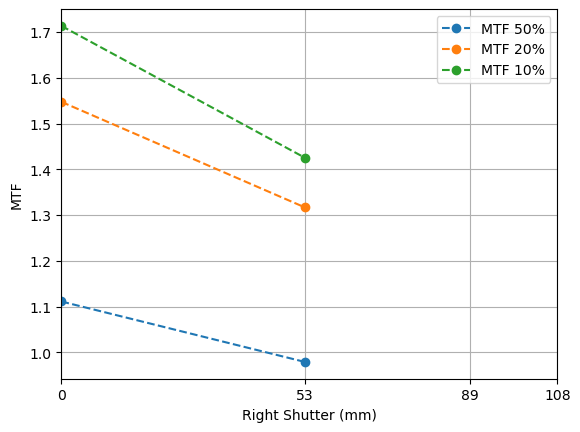

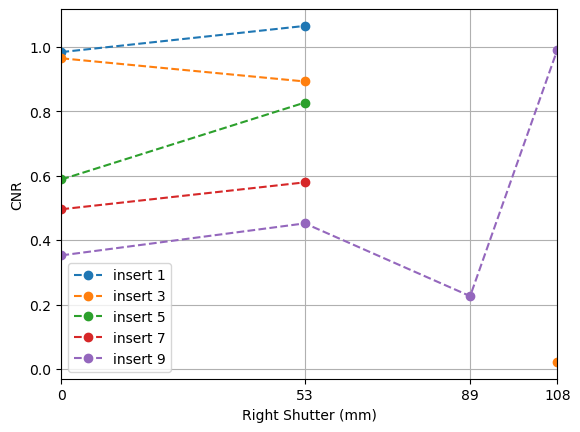

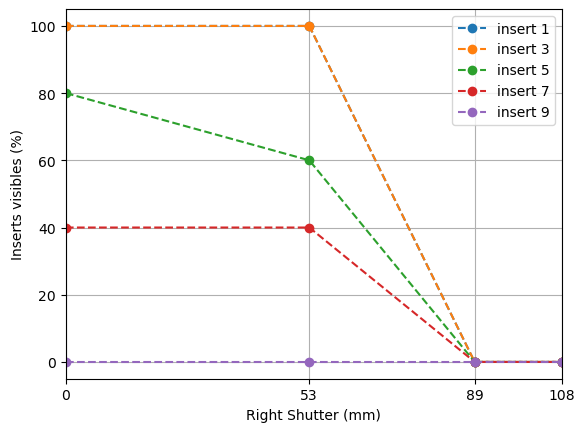

In [7]:
plot(os.path.join(PATH, "Diaphragme.csv"), "Diaph", [0, 53, 89, 108], "Right Shutter (mm)", (0, 108), 24)

## Angles

C:\Users\ldalbosc\AppData\Local\Temp\ipykernel_12412\1652990.py:73: RuntimeWarning: invalid value encountered in scalar divide
  CNR_1_v[i, j] = (df_CNR_1_v[df_CNR_1_v == "Yes"].count() / len(df_CNR_1_v)) * 100
C:\Users\ldalbosc\AppData\Local\Temp\ipykernel_12412\1652990.py:74: RuntimeWarning: invalid value encountered in scalar divide
  CNR_3_v[i, j] = (df_CNR_3_v[df_CNR_3_v == "Yes"].count() / len(df_CNR_3_v)) * 100
C:\Users\ldalbosc\AppData\Local\Temp\ipykernel_12412\1652990.py:75: RuntimeWarning: invalid value encountered in scalar divide
  CNR_5_v[i, j] = (df_CNR_5_v[df_CNR_5_v == "Yes"].count() / len(df_CNR_5_v)) * 100
C:\Users\ldalbosc\AppData\Local\Temp\ipykernel_12412\1652990.py:76: RuntimeWarning: invalid value encountered in scalar divide
  CNR_7_v[i, j] = (df_CNR_7_v[df_CNR_7_v == "Yes"].count() / len(df_CNR_7_v)) * 100
C:\Users\ldalbosc\AppData\Local\Temp\ipykernel_12412\1652990.py:77: RuntimeWarning: invalid value encountered in scalar divide
  CNR_9_v[i, j] = (df_CNR_9_v

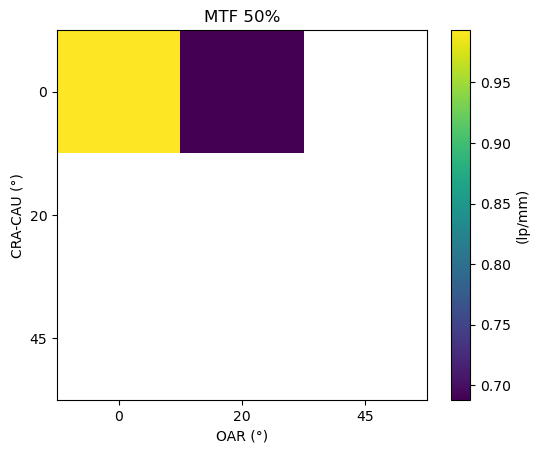

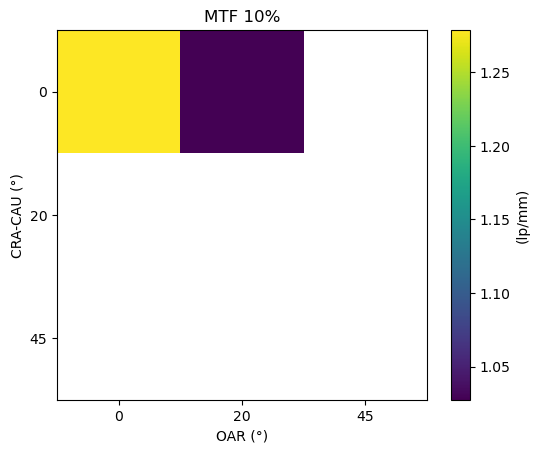

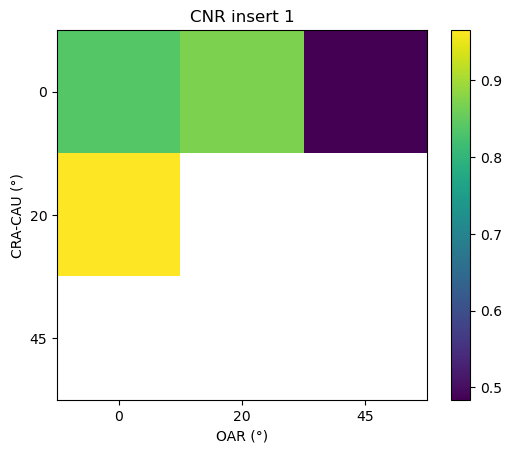

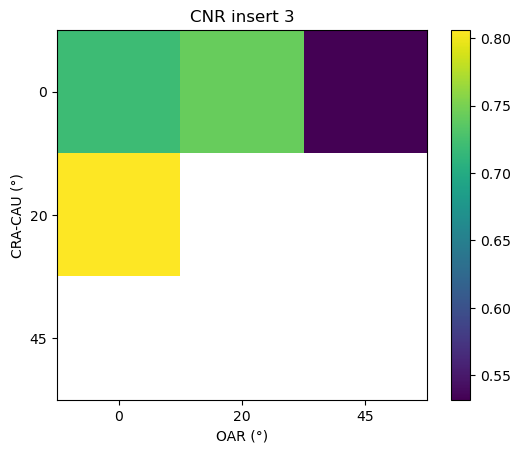

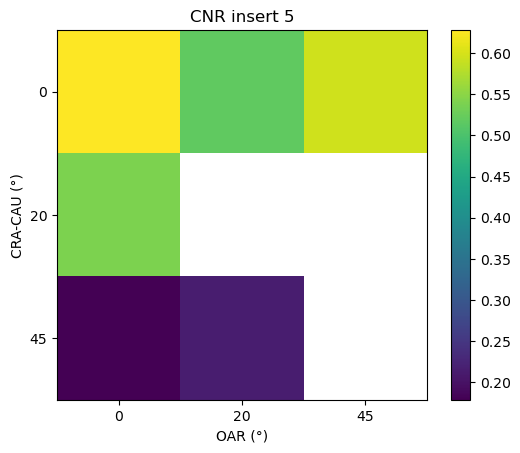

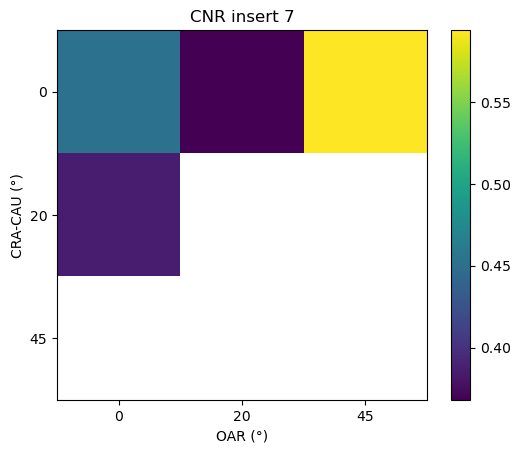

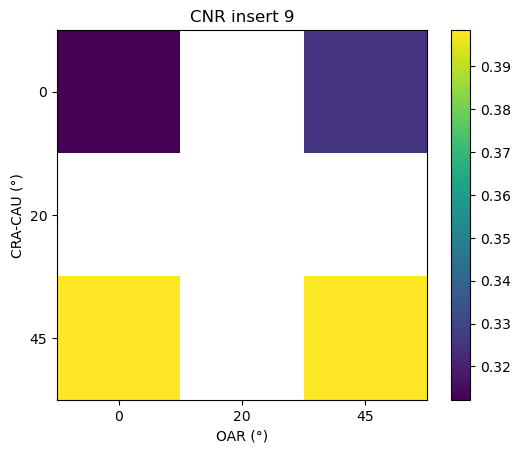

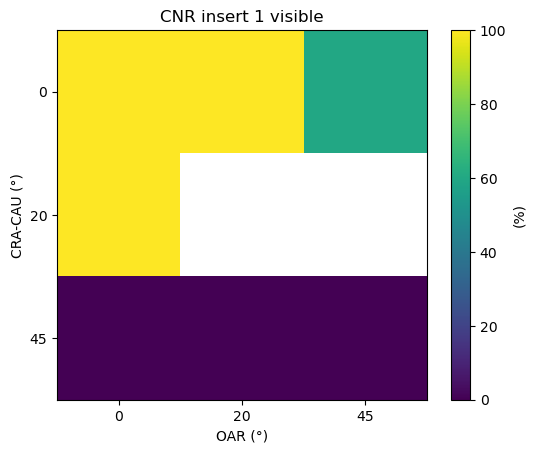

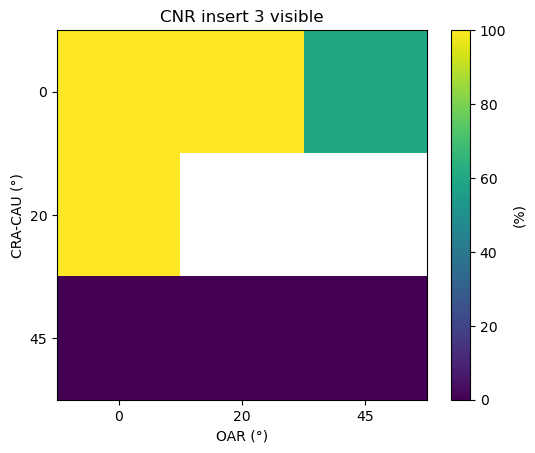

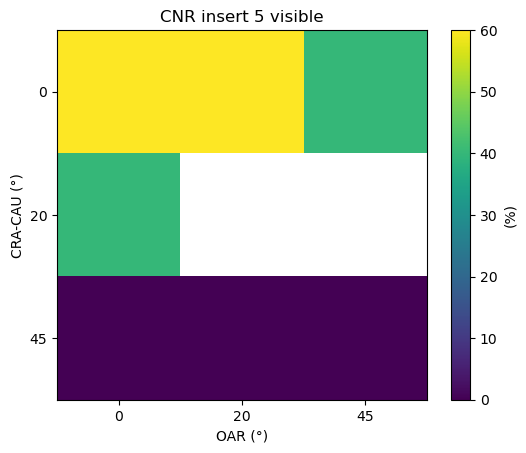

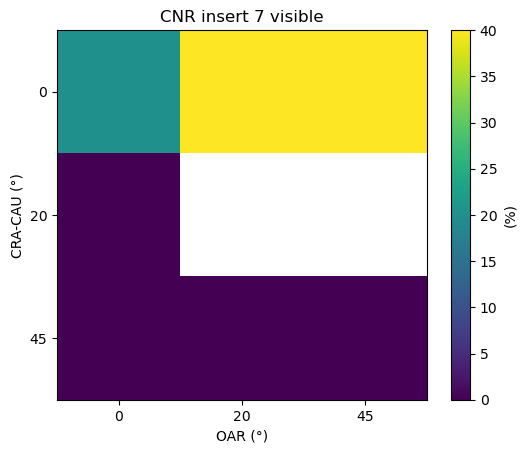

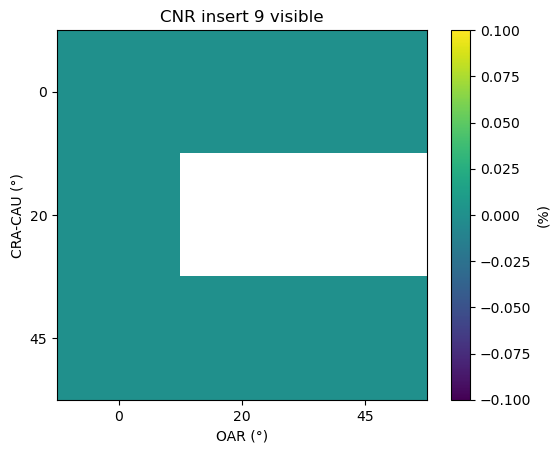

In [41]:
def plot(filepath, start_CNR_column):
    df = pd.read_csv(filepath)

    col = []
    for ele in df.columns:
        if "Angle_PMMA" in ele: col.append(ele)

    df = df[col]
    df.loc[-1] = [i.split("_")[-3] for i in df.columns]
    df.loc[-2] = [i.split("_")[-2] for i in df.columns]
    df = df.T

    OARs = [0, 20, 45]
    CRA_CAUs = [0, 20, 45]

    MTF_50 = np.zeros((len(CRA_CAUs), len(OARs)))
    MTF_10 = np.zeros((len(CRA_CAUs), len(OARs)))

    CNR_1 = np.zeros((len(CRA_CAUs), len(OARs)))
    CNR_3 = np.zeros((len(CRA_CAUs), len(OARs)))
    CNR_5 = np.zeros((len(CRA_CAUs), len(OARs)))
    CNR_7 = np.zeros((len(CRA_CAUs), len(OARs)))
    CNR_9 = np.zeros((len(CRA_CAUs), len(OARs)))

    CNR_1_v = np.zeros((len(CRA_CAUs), len(OARs)))
    CNR_3_v = np.zeros((len(CRA_CAUs), len(OARs)))
    CNR_5_v = np.zeros((len(CRA_CAUs), len(OARs)))
    CNR_7_v = np.zeros((len(CRA_CAUs), len(OARs)))
    CNR_9_v = np.zeros((len(CRA_CAUs), len(OARs)))


    for i, CRA_CAU in enumerate(CRA_CAUs):
        for j, OAR in enumerate(OARs):

            df_x = df.loc[df[-1] == str(OAR)]
            df_x = df_x.loc[df_x[-2] == str(CRA_CAU)]

            # MTF
            df_MTF_50 = df_x[5] 
            df_MTF_10 = df_x[7] 

            df_MTF_50 = pd.to_numeric(df_MTF_50)
            df_MTF_10 = pd.to_numeric(df_MTF_10)

            MTF_50[i, j] = df_MTF_50.mean()
            MTF_10[i, j] = df_MTF_10.mean()

            # CNR
            df_CNR_1 = df_x[start_CNR_column]
            df_CNR_3 = df_x[start_CNR_column+4]
            df_CNR_5 = df_x[start_CNR_column+8]
            df_CNR_7 = df_x[start_CNR_column+12]
            df_CNR_9 = df_x[start_CNR_column+16]

            df_CNR_1 = pd.to_numeric(df_CNR_1)
            df_CNR_3 = pd.to_numeric(df_CNR_3)
            df_CNR_5 = pd.to_numeric(df_CNR_5)
            df_CNR_7 = pd.to_numeric(df_CNR_7)
            df_CNR_9 = pd.to_numeric(df_CNR_9)

            CNR_1[i, j] = df_CNR_1.mean()
            CNR_3[i, j] = df_CNR_3.mean()
            CNR_5[i, j] = df_CNR_5.mean()
            CNR_7[i, j] = df_CNR_7.mean()
            CNR_9[i, j] = df_CNR_9.mean()

            df_CNR_1_v = df_x[start_CNR_column+1]
            df_CNR_3_v = df_x[start_CNR_column+5]
            df_CNR_5_v = df_x[start_CNR_column+9]
            df_CNR_7_v = df_x[start_CNR_column+13]
            df_CNR_9_v = df_x[start_CNR_column+17]

            CNR_1_v[i, j] = (df_CNR_1_v[df_CNR_1_v == "Yes"].count() / len(df_CNR_1_v)) * 100
            CNR_3_v[i, j] = (df_CNR_3_v[df_CNR_3_v == "Yes"].count() / len(df_CNR_3_v)) * 100
            CNR_5_v[i, j] = (df_CNR_5_v[df_CNR_5_v == "Yes"].count() / len(df_CNR_5_v)) * 100
            CNR_7_v[i, j] = (df_CNR_7_v[df_CNR_7_v == "Yes"].count() / len(df_CNR_7_v)) * 100
            CNR_9_v[i, j] = (df_CNR_9_v[df_CNR_9_v == "Yes"].count() / len(df_CNR_9_v)) * 100

            
    f, ax = plt.subplots()
    im = ax.imshow(MTF_50)
    ax.set_title("MTF 50%")
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(OARs)
    ax.set_yticks([0, 1, 2])
    ax.set_yticklabels(CRA_CAUs)
    ax.set_xlabel("OAR (°)")
    ax.set_ylabel("CRA-CAU (°)")
    f.colorbar(im, ax=ax, label='(lp/mm)')

    f, ax = plt.subplots()
    im = ax.imshow(MTF_10)
    ax.set_title("MTF 10%")
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(OARs)
    ax.set_yticks([0, 1, 2])
    ax.set_yticklabels(CRA_CAUs)
    ax.set_xlabel("OAR (°)")
    ax.set_ylabel("CRA-CAU (°)")
    f.colorbar(im, ax=ax, label='(lp/mm)')

    f, ax = plt.subplots()
    im = ax.imshow(CNR_1)
    ax.set_title("CNR insert 1")
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(OARs)
    ax.set_yticks([0, 1, 2])
    ax.set_yticklabels(CRA_CAUs)
    ax.set_xlabel("OAR (°)")
    ax.set_ylabel("CRA-CAU (°)")
    f.colorbar(im, ax=ax)

    f, ax = plt.subplots()
    im = ax.imshow(CNR_3)
    ax.set_title("CNR insert 3")
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(OARs)
    ax.set_yticks([0, 1, 2])
    ax.set_yticklabels(CRA_CAUs)
    ax.set_xlabel("OAR (°)")
    ax.set_ylabel("CRA-CAU (°)")
    f.colorbar(im, ax=ax)

    f, ax = plt.subplots()
    im = ax.imshow(CNR_5)
    ax.set_title("CNR insert 5")
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(OARs)
    ax.set_yticks([0, 1, 2])
    ax.set_yticklabels(CRA_CAUs)
    ax.set_xlabel("OAR (°)")
    ax.set_ylabel("CRA-CAU (°)")
    f.colorbar(im, ax=ax)

    f, ax = plt.subplots()
    im = ax.imshow(CNR_7)
    ax.set_title("CNR insert 7")
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(OARs)
    ax.set_yticks([0, 1, 2])
    ax.set_yticklabels(CRA_CAUs)
    ax.set_xlabel("OAR (°)")
    ax.set_ylabel("CRA-CAU (°)")
    f.colorbar(im, ax=ax)

    f, ax = plt.subplots()
    im = ax.imshow(CNR_9)
    ax.set_title("CNR insert 9")
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(OARs)
    ax.set_yticks([0, 1, 2])
    ax.set_yticklabels(CRA_CAUs)
    ax.set_xlabel("OAR (°)")
    ax.set_ylabel("CRA-CAU (°)")
    f.colorbar(im, ax=ax)

    f, ax = plt.subplots()
    im = ax.imshow(CNR_1_v)
    ax.set_title("CNR insert 1 visible")
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(OARs)
    ax.set_yticks([0, 1, 2])
    ax.set_yticklabels(CRA_CAUs)
    ax.set_xlabel("OAR (°)")
    ax.set_ylabel("CRA-CAU (°)")
    f.colorbar(im, ax=ax, label="(%)")

    f, ax = plt.subplots()
    im = ax.imshow(CNR_3_v)
    ax.set_title("CNR insert 3 visible")
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(OARs)
    ax.set_yticks([0, 1, 2])
    ax.set_yticklabels(CRA_CAUs)
    ax.set_xlabel("OAR (°)")
    ax.set_ylabel("CRA-CAU (°)")
    f.colorbar(im, ax=ax, label="(%)")

    f, ax = plt.subplots()
    im = ax.imshow(CNR_5_v)
    ax.set_title("CNR insert 5 visible")
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(OARs)
    ax.set_yticks([0, 1, 2])
    ax.set_yticklabels(CRA_CAUs)
    ax.set_xlabel("OAR (°)")
    ax.set_ylabel("CRA-CAU (°)")
    f.colorbar(im, ax=ax, label="(%)")

    f, ax = plt.subplots()
    im = ax.imshow(CNR_7_v)
    ax.set_title("CNR insert 7 visible")
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(OARs)
    ax.set_yticks([0, 1, 2])
    ax.set_yticklabels(CRA_CAUs)
    ax.set_xlabel("OAR (°)")
    ax.set_ylabel("CRA-CAU (°)")
    f.colorbar(im, ax=ax, label="(%)")

    f, ax = plt.subplots()
    im = ax.imshow(CNR_9_v)
    ax.set_title("CNR insert 9 visible")
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(OARs)
    ax.set_yticks([0, 1, 2])
    ax.set_yticklabels(CRA_CAUs)
    ax.set_xlabel("OAR (°)")
    ax.set_ylabel("CRA-CAU (°)")
    f.colorbar(im, ax=ax, label="(%)")


plot(os.path.join(PATH, "Angle.csv"), 25)

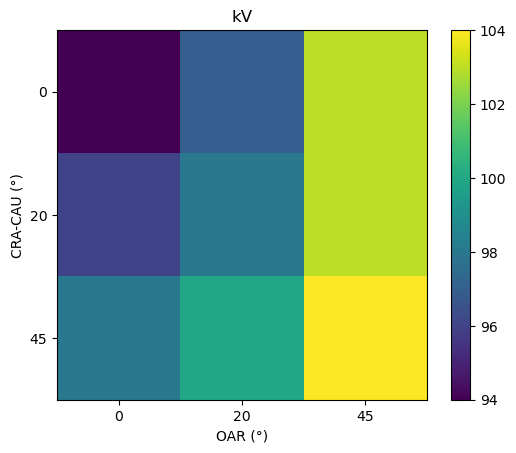

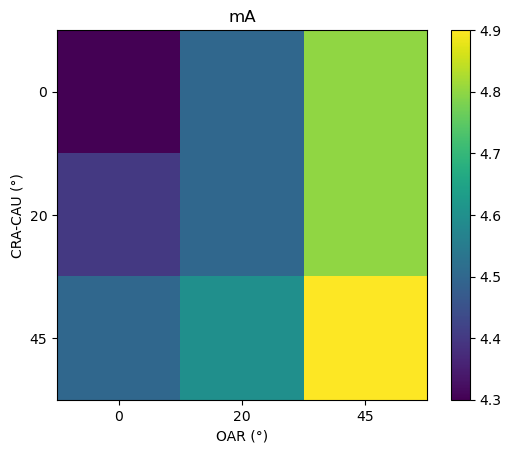

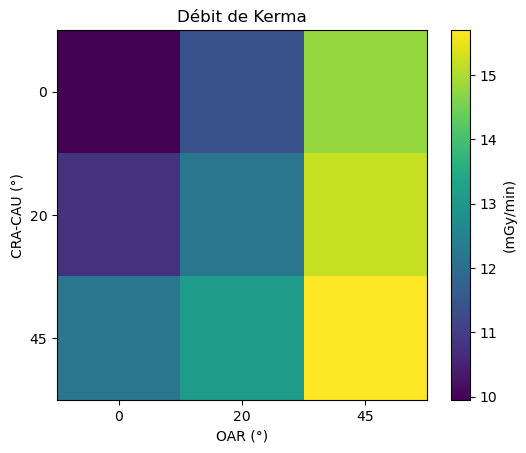

In [ ]:
def plot():
    df = pd.DataFrame(data={
            "OAG": [0, 20, 45, 0, 20, 45, 0, 20, 45], 
            "CRA-CAU": [0, 0, 0, 20, 20, 20, 45, 45, 45],
            "kV": [94, 97, 103, 96, 98, 103, 98, 100, 104],
            "mA": [4.3, 4.5, 4.8, 4.4, 4.5, 4.8, 4.5, 4.6, 4.9],
            "Kerma": [9.95, 11.4, 14.8, 10.8, 12.2, 15.2, 12.2, 13.1, 15.7],
        })

    kV = np.zeros((9))
    mA = np.zeros((9))
    Kerma = np.zeros((9))

    for i, (CRA_CAU, OAG) in enumerate(zip(df["CRA-CAU"], df["OAG"])):
        ele = df.loc[(df["CRA-CAU"] == CRA_CAU) & (df["OAG"] == OAG)]

        kV[i] = float(ele["kV"].iloc[0])
        mA[i] = float(ele["mA"].iloc[0])
        Kerma[i] = float(ele["Kerma"].iloc[0])


    kV = np.reshape(kV, (3, 3))
    mA = np.reshape(mA, (3, 3))
    Kerma = np.reshape(Kerma, (3, 3))

    f, ax = plt.subplots()
    im = ax.imshow(kV)
    ax.set_title("kV")
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels([0, 20, 45])
    ax.set_yticks([0, 1, 2])
    ax.set_yticklabels([0, 20, 45])
    ax.set_xlabel("OAR (°)")
    ax.set_ylabel("CRA-CAU (°)")
    f.colorbar(im, ax=ax)

    f, ax = plt.subplots()
    im = ax.imshow(mA)
    ax.set_title("mA")
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels([0, 20, 45])
    ax.set_yticks([0, 1, 2])
    ax.set_yticklabels([0, 20, 45])
    ax.set_xlabel("OAR (°)")
    ax.set_ylabel("CRA-CAU (°)")
    f.colorbar(im, ax=ax)

    f, ax = plt.subplots()
    im = ax.imshow(Kerma)
    ax.set_title("Débit de Kerma")
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels([0, 20, 45])
    ax.set_yticks([0, 1, 2])
    ax.set_yticklabels([0, 20, 45])
    ax.set_xlabel("OAR (°)")
    ax.set_ylabel("CRA-CAU (°)")
    f.colorbar(im, ax=ax, label='(mGy/min)')


plot()

## Filtration d'Al

C:\Users\ldalbosc\AppData\Local\Temp\ipykernel_12412\30674524.py:59: RuntimeWarning: invalid value encountered in scalar divide
  CNR_1_v.append((df_CNR_1_v[df_CNR_1_v == "Yes"].count() / len(df_CNR_1_v))*100)
C:\Users\ldalbosc\AppData\Local\Temp\ipykernel_12412\30674524.py:60: RuntimeWarning: invalid value encountered in scalar divide
  CNR_3_v.append((df_CNR_3_v[df_CNR_3_v == "Yes"].count() / len(df_CNR_3_v))*100)
C:\Users\ldalbosc\AppData\Local\Temp\ipykernel_12412\30674524.py:61: RuntimeWarning: invalid value encountered in scalar divide
  CNR_5_v.append((df_CNR_5_v[df_CNR_5_v == "Yes"].count() / len(df_CNR_5_v))*100)
C:\Users\ldalbosc\AppData\Local\Temp\ipykernel_12412\30674524.py:62: RuntimeWarning: invalid value encountered in scalar divide
  CNR_7_v.append((df_CNR_7_v[df_CNR_7_v == "Yes"].count() / len(df_CNR_7_v))*100)
C:\Users\ldalbosc\AppData\Local\Temp\ipykernel_12412\30674524.py:63: RuntimeWarning: invalid value encountered in scalar divide
  CNR_9_v.append((df_CNR_9_v[df_

[0.95, nan, 1.4290823557135803, 1.1732746197042803, nan, 1.0995616459085749]


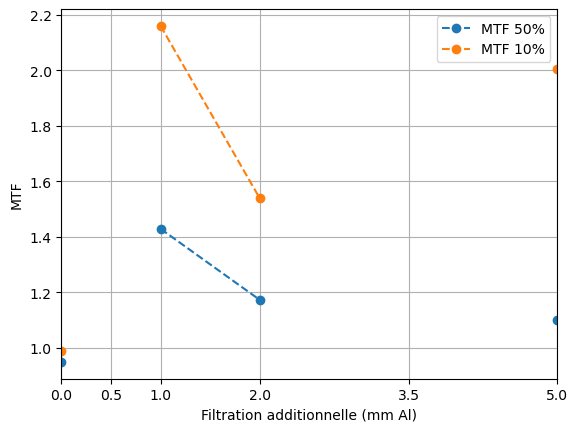

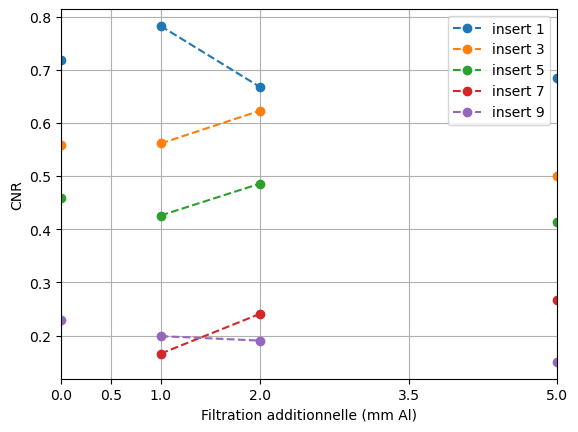

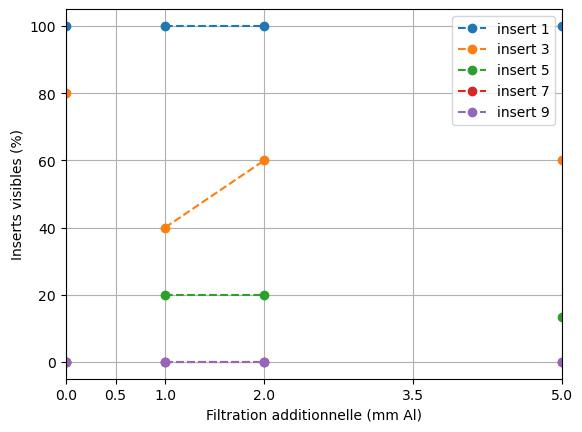

In [92]:
#filepath, column_name, x_data, x_label, x_lim, start_CNR_column

plot(os.path.join(PATH, "FiltrationAl.csv"), "AL", [0, 0.5, 1, 2, 3.5, 5], "Filtration additionnelle (mm Al)", (0, 5), 25)